In [1]:
import pandas as pd
pd.set_option("max_columns", None)
restaurants = pd.read_csv("../data/yelp_dohmh_agg_data.csv", index_col=0)
restaurants.head()

,DOHMH DBA,DOHMH BORO,DOHMH BUILDING,DOHMH STREET,DOHMH ZIPCODE,DOHMH PHONE,DOHMH CUISINE DESCRIPTION,DOHMH INITIAL INSPECTION DATE,DOHMH ACTION,DOHMH VIOLATION CODE,DOHMH VIOLATION DESCRIPTION,DOHMH CRITICAL FLAG,DOHMH SCORE,DOHMH GRADE,DOHMH GRADE DATE,DOHMH RECORD DATE,DOHMH INITIAL INSPECTION TYPE,DOHMH LATEST INSPECTION DATE,YELP IS CLOSED,YELP LATITUDE,YELP ADDRESS,YELP ID,YELP RATING,YELP REVIEW COUNT,YELP IS CLAIMED,YELP LONGITUDE,YELP NEIGHBORHOODS,YELP CATEGORIES,YELP NAME
CAMIS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30075445,MORRIS PARK BAKE SHOP,BRONX,1007.0,MORRIS PARK AVE,10462,7.188925e+09,Bakery,2013-06-01,Violations were cited in the following area(s).,16B,The original nutritional fact labels and/or in...,Not Critical,NaN,NaN,NaN,09/27/2016,Trans Fat / Compliance Inspection,2016-02-18,False,40.848446,1007 Morris Park Avenue,morris-pk-bake-shop-bronx,4.5,27.0,False,-73.856079,Morris Park,Bakeries|Desserts,Morris Pk Bake Shop
30112340,WENDY'S,BROOKLYN,469.0,FLATBUSH AVENUE,11225,7.182875e+09,Hamburgers,2014-06-05,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,13.0,NaN,NaN,09/27/2016,Cycle Inspection / Initial Inspection,2016-04-30,False,40.662952,469 Flatbush Ave,wendys-brooklyn-4,2.0,23.0,False,-73.961753,Prospect Heights|Prospect Lefferts Gardens,Fast Food|Burgers,Wendy's
30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351.0,WEST 57 STREET,10019,2.122453e+09,Irish,2013-07-22,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,11.0,A,07/22/2013,09/27/2016,Cycle Inspection / Initial Inspection,2016-05-31,False,40.767750,351 W 57th St,dj-reynolds-new-york-3,3.0,75.0,False,-73.984870,Midtown West|Hell's Kitchen,Irish|Pubs,DJ Reynolds
40356018,RIVIERA CATERER,BROOKLYN,2780.0,STILLWELL AVENUE,11224,7.183723e+09,American,2013-06-05,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,06/05/2013,09/27/2016,Cycle Inspection / Initial Inspection,2016-05-16,False,40.579521,2780 Stillwell Ave,riviera-caterers-brooklyn,4.0,23.0,True,-73.982430,Coney Island,Caterers,Riviera Caterers
40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825.0,ASTORIA BOULEVARD,11369,7.183351e+09,American,2014-04-11,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,50.0,NaN,NaN,09/27/2016,Cycle Inspection / Initial Inspection,2016-05-14,False,40.764240,8825 Astoria Blvd,events-by-brunos-jackson-heights,4.0,15.0,True,-73.880410,East Elmhurst,Caterers|Venues & Event Spaces,Events By Bruno's


In [7]:
restaurants_geo = restaurants[(pd.notnull(restaurants['YELP NEIGHBORHOODS'])) &
                              (pd.notnull(restaurants['YELP LATITUDE'])) &
                              (pd.notnull(restaurants['YELP LONGITUDE']))]
neighborhoods = restaurants_geo['YELP NEIGHBORHOODS'].map(lambda n: n.split("|") if pd.notnull(n) else None)
neighborhoods.head()

CAMIS
30075445                                    [Morris Park]
30112340    [Prospect Heights, Prospect Lefferts Gardens]
30191841                   [Midtown West, Hell's Kitchen]
40356018                                   [Coney Island]
40356151                                  [East Elmhurst]
Name: YELP NEIGHBORHOODS, dtype: object

In [10]:
restaurants_geo[['YELP LATITUDE', 'YELP LONGITUDE']].head()

,YELP LATITUDE,YELP LONGITUDE
CAMIS,,
30075445,40.848446,-73.856079
30112340,40.662952,-73.961753
30191841,40.767750,-73.984870
40356018,40.579521,-73.982430
40356151,40.764240,-73.880410


In [12]:
import numpy as np
neighborhoods.values

array([['Morris Park'], ['Prospect Heights', 'Prospect Lefferts Gardens'],
       ['Midtown West', "Hell's Kitchen"], ..., ['Manhattan Valley'],
       ['Flushing', 'Downtown Flushing'], ['Jamaica']], dtype=object)

In [34]:
neighborhoods_list = []
for ns in neighborhoods.values:
    for n in ns:
        neighborhoods_list.append(n)
neighborhoods_list = np.array(neighborhoods_list)

In [37]:
neighborhood_observation_counts = pd.Series(neighborhoods_list).value_counts()

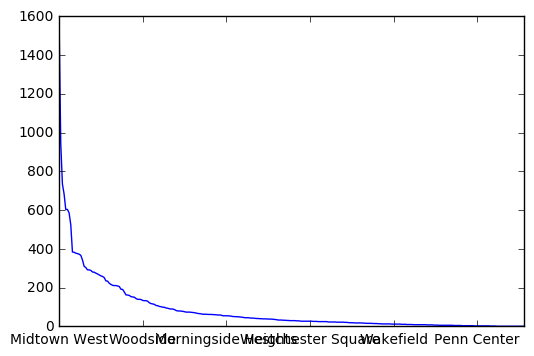

In [41]:
%matplotlib inline
neighborhood_observation_counts.plot()

In [45]:
max([len(n) for n in neighborhoods.values])

5

In [46]:
np.argmax([len(n) for n in neighborhoods.values])

8003

In [48]:
neighborhoods.iloc[8003]

['Flatiron', 'Union Square', 'Gramercy', 'East Village', 'Greenwich Village']

In [50]:
restaurants_geo.iloc[8003]

DOHMH DBA                                                                   SUBWAY
DOHMH BORO                                                               MANHATTAN
DOHMH BUILDING                                                                   1
DOHMH STREET                                                          IRVING PLACE
DOHMH ZIPCODE                                                                10003
DOHMH PHONE                                                            2.12778e+09
DOHMH CUISINE DESCRIPTION                                               Sandwiches
DOHMH INITIAL INSPECTION DATE                                           2013-09-25
DOHMH ACTION                       Violations were cited in the following area(s).
DOHMH VIOLATION CODE                                                           08A
DOHMH VIOLATION DESCRIPTION      Facility not vermin proof. Harborage or condit...
DOHMH CRITICAL FLAG                                                   Not Critical
DOHM

In [54]:
neighborhoods_fived = np.asarray([n + [None]*(5 - len(n)) for n in neighborhoods.values])

In [57]:
geo = restaurants_geo[['YELP LATITUDE', 'YELP LONGITUDE']]
geo['NEIGHBORHOOD 1'] = neighborhoods_fived[:,0]
geo['NEIGHBORHOOD 2'] = neighborhoods_fived[:,1]
geo['NEIGHBORHOOD 3'] = neighborhoods_fived[:,2]
geo['NEIGHBORHOOD 4'] = neighborhoods_fived[:,3]
geo['NEIGHBORHOOD 5'] = neighborhoods_fived[:,4]

C:\Users\Alex\Anaconda3\envs\nyc-restaurant-trends\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Alex\Anaconda3\envs\nyc-restaurant-trends\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Alex\Anaconda3\envs\nyc-restaurant-trends\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [59]:
geo.head()

,YELP LATITUDE,YELP LONGITUDE,NEIGHBORHOOD 1,NEIGHBORHOOD 2,NEIGHBORHOOD 3,NEIGHBORHOOD 4,NEIGHBORHOOD 5
CAMIS,,,,,,,
30075445,40.848446,-73.856079,Morris Park,None,None,None,None
30112340,40.662952,-73.961753,Prospect Heights,Prospect Lefferts Gardens,None,None,None
30191841,40.767750,-73.984870,Midtown West,Hell's Kitchen,None,None,None
40356018,40.579521,-73.982430,Coney Island,None,None,None,None
40356151,40.764240,-73.880410,East Elmhurst,None,None,None,None


In [61]:
import mplleaflet
import matplotlib.pyplot as plt

In [71]:
midtown_west_coords = geo[(geo['NEIGHBORHOOD 1'] == 'Midtown West') |
                          (geo['NEIGHBORHOOD 2'] == 'Midtown West') |
                          (geo['NEIGHBORHOOD 3'] == 'Midtown West') |
                          (geo['NEIGHBORHOOD 4'] == 'Midtown West') |
                          (geo['NEIGHBORHOOD 5'] == 'Midtown West')][['YELP LATITUDE', 'YELP LONGITUDE']].values

In [76]:
plt.scatter(midtown_west_coords[:,1], midtown_west_coords[:,0])
mplleaflet.show()

In [77]:
len(neighborhood_observation_counts)

279

In [82]:
neighborhood_observation_counts.index[100], neighborhood_observation_counts[100]

('Morningside Heights', 55)

In [83]:
morningside_coords = geo[(geo['NEIGHBORHOOD 1'] == 'Morningside Heights') |
                         (geo['NEIGHBORHOOD 2'] == 'Morningside Heights') |
                         (geo['NEIGHBORHOOD 3'] == 'Morningside Heights') |
                         (geo['NEIGHBORHOOD 4'] == 'Morningside Heights') |
                         (geo['NEIGHBORHOOD 5'] == 'Morningside Heights')][['YELP LATITUDE', 'YELP LONGITUDE']].values
plt.scatter(morningside_coords[:,1], morningside_coords[:,0])
mplleaflet.show()

In [85]:
neighborhood_observation_counts.index[200], neighborhood_observation_counts[200]

('Wakefield', 12)

In [86]:
wakefield_coords = geo[(geo['NEIGHBORHOOD 1'] == 'Wakefield') |
                       (geo['NEIGHBORHOOD 2'] == 'Wakefield') |
                       (geo['NEIGHBORHOOD 3'] == 'Wakefield') |
                       (geo['NEIGHBORHOOD 4'] == 'Wakefield') |
                       (geo['NEIGHBORHOOD 5'] == 'Wakefield')][['YELP LATITUDE', 'YELP LONGITUDE']].values
plt.scatter(wakefield_coords[:,1], wakefield_coords[:,0])
mplleaflet.show()